In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

10.40964449877734 -168.52142876855405
-66.58877639016029 -15.899929775416268
-4.867012990251524 -126.3611378003287
-78.84044905177771 104.06417349360072
4.632766726043641 -172.36982839048454
-53.00362261485065 80.54966416838334
-45.91313493320647 -17.692646980174146
-39.924014258866784 -65.93555908958253
-39.292408356428226 -71.64863054870553
24.851108664164315 57.97994034659169
24.104015459029995 149.5720779980768
73.75145237737738 -99.78943306259428
-81.61776164921162 -150.07323284672913
-18.523130436794787 -117.09383094005824
37.245046476830495 12.330698120762406
25.372228113499133 167.31242048663074
-87.67504651793648 -171.576216711629
35.98787736643753 -149.10382321279437
-49.02653197280832 142.64732236355093
-10.395427147041431 -79.38548870160683
-23.081891048825867 118.92721270784045
-37.77944482637801 86.10958800448356
36.08858655672232 73.61654688722533
-0.33681898702374724 -53.14425690570826
52.01989537145204 -177.75959138913248
47.6391346500551 -109.29556225033288
65.4915055

58.822176816738676 34.54903845439682
-55.854454172823154 -152.9630455693352
11.320324027705666 -70.1567319665435
-30.290549903130845 142.32697499662493
-65.47714846024775 73.02697005885432
-14.248907322302301 -171.77325828022552
-27.39828702656373 -34.88279190072163
-85.01221336140972 -38.57652472648169
-74.85976691415775 130.55547920249404
48.15983961970312 -31.261891392716365
-78.14705869236165 84.17040810502033
-45.71449373999403 -155.3047418892878
52.64019449782427 32.79148995607878
-45.665813993798004 -5.597028697539486
-13.559491771185037 125.23265593770935
-18.942890697417994 -125.5912500474455
-32.909495348622904 130.01924705654102
-40.94371516487478 -107.76843252698616
-2.957933822954516 167.81976648897552
-72.45206815499745 -68.59269991581199
-27.302316091340963 -21.813687910754254
-53.848919623756096 29.634914457304063
-34.451917319312784 82.25099891246077
0.8517110926352558 48.38439572960823
-23.503250871246948 -157.8898464432295
45.38066263611293 -3.668024573372662
-27.568

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# starting URL for Weather Map API Call

url="https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | kapaa
Processing Record 2 of Set 13 | cape town
Processing Record 3 of Set 13 | atuona
Processing Record 4 of Set 13 | albany
Processing Record 5 of Set 13 | saleaula
City not found. Skipping...
Processing Record 6 of Set 13 | mahebourg
Processing Record 7 of Set 13 | jamestown
Processing Record 8 of Set 13 | general roca
Processing Record 9 of Set 13 | villarrica
Processing Record 10 of Set 13 | muscat
Processing Record 11 of Set 13 | katsuura
Processing Record 12 of Set 13 | thompson
Processing Record 13 of Set 13 | mataura
Processing Record 14 of Set 13 | rikitea
Processing Record 15 of Set 13 | mazara del vallo
Processing Record 16 of Set 13 | butaritari
Processing Record 17 of Set 13 | vaini
Processing Record 18 of Set 13 | kahului
Processing Record 19 of Set 13 | new norfolk
Processing Record 20 of Set 13 | huarmey
Processing Record 21 of Set 13 | port hedland
Processing Record 22 of Set 1

City not found. Skipping...
Processing Record 31 of Set 16 | kodiak
Processing Record 32 of Set 16 | vardo
Processing Record 33 of Set 16 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 16 | coquimbo
Processing Record 35 of Set 16 | seoul
Processing Record 36 of Set 16 | georgetown
Processing Record 37 of Set 16 | avera
Processing Record 38 of Set 16 | lipno
Processing Record 39 of Set 16 | sandy bay
Processing Record 40 of Set 16 | gari
Processing Record 41 of Set 16 | guasave
Processing Record 42 of Set 16 | kota kinabalu
Processing Record 43 of Set 16 | sakakah
Processing Record 44 of Set 16 | guerrero negro
Processing Record 45 of Set 16 | khatanga
Processing Record 46 of Set 16 | severo-kurilsk
Processing Record 47 of Set 16 | upernavik
Processing Record 48 of Set 16 | chicama
Processing Record 49 of Set 16 | sitka
Processing Record 50 of Set 16 | napoleon
Processing Record 1 of Set 17 | pacific grove
Processing Record 2 of Set 17 | kerteh
City not found. S

Processing Record 15 of Set 20 | kuching
Processing Record 16 of Set 20 | nishihara
Processing Record 17 of Set 20 | machico
Processing Record 18 of Set 20 | anadyr
Processing Record 19 of Set 20 | faya
Processing Record 20 of Set 20 | macaboboni
City not found. Skipping...
Processing Record 21 of Set 20 | mbulu
Processing Record 22 of Set 20 | coos bay
Processing Record 23 of Set 20 | touros
Processing Record 24 of Set 20 | gornopravdinsk
Processing Record 25 of Set 20 | mersing
Processing Record 26 of Set 20 | sena madureira
Processing Record 27 of Set 20 | quatre cocos
Processing Record 28 of Set 20 | ayan
Processing Record 29 of Set 20 | wamba
Processing Record 30 of Set 20 | nouadhibou
Processing Record 31 of Set 20 | gangotri
City not found. Skipping...
Processing Record 32 of Set 20 | shache
Processing Record 33 of Set 20 | greenville
Processing Record 34 of Set 20 | zhigansk
Processing Record 35 of Set 20 | wageningen
Processing Record 36 of Set 20 | porto tolle
Processing Reco

City not found. Skipping...
Processing Record 3 of Set 24 | otorohanga
Processing Record 4 of Set 24 | lavrentiya
Processing Record 5 of Set 24 | kangaba
Processing Record 6 of Set 24 | waddan
Processing Record 7 of Set 24 | sal rei
Processing Record 8 of Set 24 | vila velha
Processing Record 9 of Set 24 | gravelbourg
Processing Record 10 of Set 24 | shubarshi
Processing Record 11 of Set 24 | panaba
Processing Record 12 of Set 24 | lupiro
Processing Record 13 of Set 24 | niimi
Processing Record 14 of Set 24 | kurikka
Processing Record 15 of Set 24 | kutulik
Processing Record 16 of Set 24 | de aar
Processing Record 17 of Set 24 | morehead
Processing Record 18 of Set 24 | tarko-sale
Processing Record 19 of Set 24 | viedma
Processing Record 20 of Set 24 | siaya
Processing Record 21 of Set 24 | wahiawa
Processing Record 22 of Set 24 | katete
Processing Record 23 of Set 24 | mount isa
Processing Record 24 of Set 24 | guozhen
Processing Record 25 of Set 24 | paytug
City not found. Skipping..

In [16]:
# Print the city count to confirm sufficient count.
len(cities)

623

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,75.20,83,1,5.82,US,2020-10-31 18:35:06
1,Cape Town,-33.93,18.42,64.40,59,0,18.34,ZA,2020-10-31 18:32:23
2,Atuona,-9.80,-139.03,78.35,75,10,18.90,PF,2020-10-31 18:35:07
3,Albany,42.60,-73.97,44.01,68,0,5.39,US,2020-10-31 18:31:22
4,Mahebourg,-20.41,57.70,68.00,77,20,6.93,MU,2020-10-31 18:35:07
5,Jamestown,42.10,-79.24,43.00,69,90,13.87,US,2020-10-31 18:35:08
6,General Roca,-39.03,-67.58,86.00,19,0,11.41,AR,2020-10-31 18:31:09
7,Villarrica,-25.75,-56.43,83.16,40,0,9.53,PY,2020-10-31 18:35:08
8,Muscat,23.61,58.59,75.20,69,0,5.82,OM,2020-10-31 18:32:00
9,Katsuura,35.13,140.30,51.80,76,0,9.17,JP,2020-10-31 18:30:24


In [22]:
# Reorder columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-10-31 18:35:06,22.08,-159.32,75.20,83,1,5.82
1,Cape Town,ZA,2020-10-31 18:32:23,-33.93,18.42,64.40,59,0,18.34
2,Atuona,PF,2020-10-31 18:35:07,-9.80,-139.03,78.35,75,10,18.90
3,Albany,US,2020-10-31 18:31:22,42.60,-73.97,44.01,68,0,5.39
4,Mahebourg,MU,2020-10-31 18:35:07,-20.41,57.70,68.00,77,20,6.93
5,Jamestown,US,2020-10-31 18:35:08,42.10,-79.24,43.00,69,90,13.87
6,General Roca,AR,2020-10-31 18:31:09,-39.03,-67.58,86.00,19,0,11.41
7,Villarrica,PY,2020-10-31 18:35:08,-25.75,-56.43,83.16,40,0,9.53
8,Muscat,OM,2020-10-31 18:32:00,23.61,58.59,75.20,69,0,5.82
9,Katsuura,JP,2020-10-31 18:30:24,35.13,140.30,51.80,76,0,9.17


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time

# Get today's date in seconds. 
today = time.strftime("%x")
today

'10/31/20'

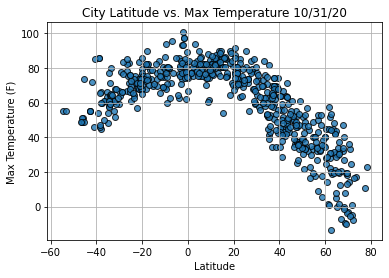

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

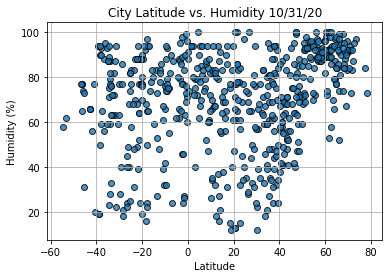

In [28]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

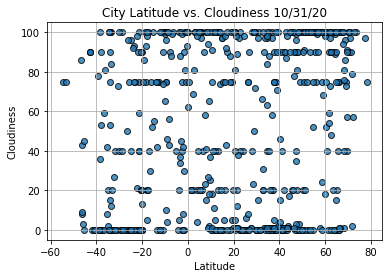

In [29]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

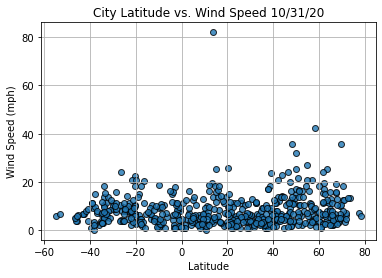

In [30]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [49]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [50]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [51]:
index13 = city_data_df.loc[13] 
index13

City             Mazara Del Vallo
Country                        IT
Date          2020-10-31 18:35:10
Lat                         37.66
Lng                         12.59
Max Temp                     64.4
Humidity                       88
Cloudiness                      0
Wind Speed                   2.24
Name: 13, dtype: object

In [52]:
# Filter to show Northern Hem. lats only.

city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
570    False
571     True
572     True
573     True
574    False
Name: Lat, Length: 575, dtype: bool

In [53]:
# return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-10-31 18:35:06,22.08,-159.32,75.20,83,1,5.82
3,Albany,US,2020-10-31 18:31:22,42.60,-73.97,44.01,68,0,5.39
5,Jamestown,US,2020-10-31 18:35:08,42.10,-79.24,43.00,69,90,13.87
8,Muscat,OM,2020-10-31 18:32:00,23.61,58.59,75.20,69,0,5.82
9,Katsuura,JP,2020-10-31 18:30:24,35.13,140.30,51.80,76,0,9.17
...,...,...,...,...,...,...,...,...,...
566,Mnogovershinnyy,RU,2020-10-31 18:38:19,53.94,139.92,29.66,96,100,2.93
567,Flin Flon,CA,2020-10-31 18:37:26,54.77,-101.86,19.40,73,75,20.80
571,Shiyan,CN,2020-10-31 18:38:21,32.65,110.78,59.56,63,100,3.02
572,Santa Barbara,US,2020-10-31 18:38:21,34.73,-120.03,75.00,39,1,3.18


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

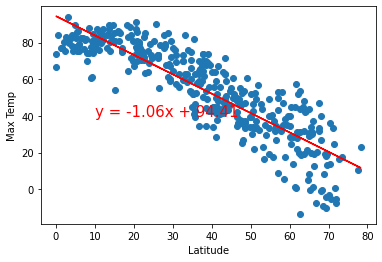

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

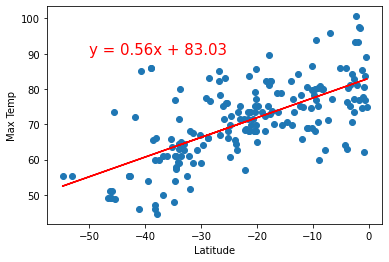

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

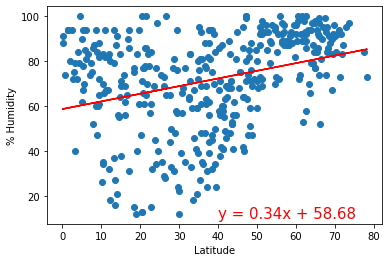

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

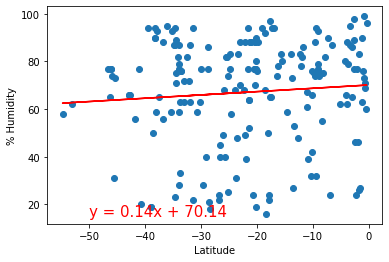

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for % Humidity', '% Humidity',(-50,15))

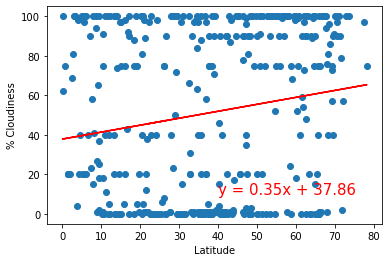

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

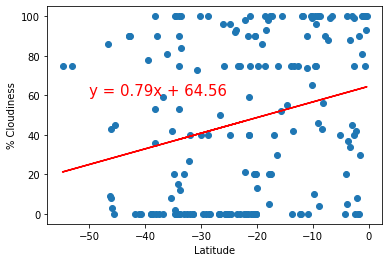

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for % Cloudiness', '% Cloudiness',(-50,60))

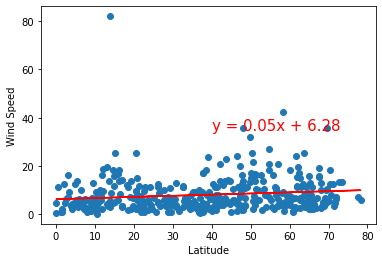

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

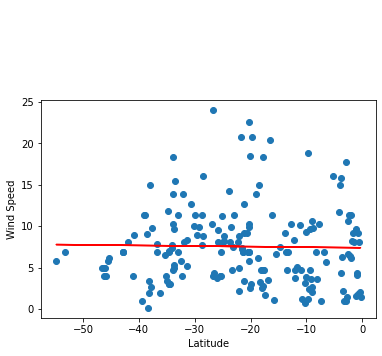

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))